<a href="https://colab.research.google.com/github/Rameshyab/RagaAI-Catalyst/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
Using 'price' as the target column.

Mean Squared Error: 986921767056.10
R² Score: 0.03


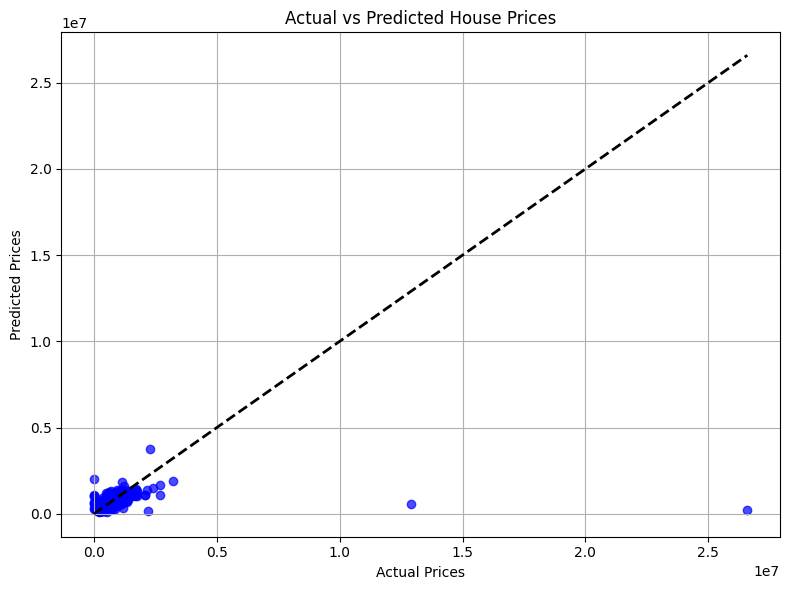

In [5]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# STEP 1: Extract ZIP file
zip_path = "archive (2).zip"
extract_dir = "housing_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# STEP 2: Load CSV file
csv_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv')]
csv_path = os.path.join(extract_dir, csv_files[0])
df = pd.read_csv(csv_path)

# STEP 3: Print columns and find target
print("Columns in the dataset:", df.columns.tolist())
target_column = 'price'
print(f"Using '{target_column}' as the target column.")

# STEP 4: Drop non-numeric or irrelevant columns
non_numeric_cols = ['date', 'street', 'city', 'statezip', 'country']
df = df.drop(columns=[col for col in non_numeric_cols if col in df.columns])

# STEP 5: Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# STEP 6: Handle any remaining non-numeric columns automatically (just in case)
X = X.select_dtypes(include=[float, int])  # Keep only numeric columns

# STEP 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 9: Predict and evaluate
y_pred = model.predict(X_test)
print(f"\nMean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# STEP 10: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
